In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X_seen= np.load('/Users/harry/Downloads/cs-771/data/AwA_python/X_seen.npy', allow_pickle =True,encoding ='bytes')

In [3]:
X_test =  np.load('/Users/harry/Downloads/cs-771/data/AwA_python/Xtest.npy', allow_pickle =True,encoding ='bytes')
Y_test =  np.load('/Users/harry/Downloads/cs-771/data/AwA_python/Ytest.npy', allow_pickle =True,encoding ='bytes')
ca_seen =  np.load('/Users/harry/Downloads/cs-771/data/AwA_python/class_attributes_seen.npy', allow_pickle =True,encoding ='bytes')
ca_unseen = np.load('/Users/harry/Downloads/cs-771/data/AwA_python/class_attributes_unseen.npy', allow_pickle =True,encoding ='bytes')

In [4]:
ca_seen.shape

(40, 85)

In [5]:
ca_unseen.shape

(10, 85)

In [6]:
#Computing mean of each seen class:
mean_seen=[]
for i in range(0,40):
    mean_seen.append(np.mean(X_seen[i],axis=0))

len(mean_seen)

40

In [7]:
As = ca_seen.copy()
Ms= np.array(mean_seen).reshape(40,4096)
I= np.identity(85, dtype = float)

In [8]:
As_transpose = As.transpose()

In [9]:
def calculate_mean_unseen(lbda):
    
    ## inverse : = ((As^T)(As) + lbda*I)^-1
    inverse = np.linalg.inv(np.matmul(As_transpose,As) + lbda*I)
    W = np.matmul(np.matmul(inverse,As_transpose),Ms)
    W_transpose = W.transpose()
    ca_unseen_transpose = ca_unseen.transpose()
    mean_unseen = np.matmul(W_transpose,ca_unseen_transpose).transpose()
    
    return mean_unseen
    
    
    

   


In [10]:
def calculate_accuracy(lbda):
    mean_unseen = calculate_mean_unseen(lbda)
    predict = [unique_labels[np.argmin(np.linalg.norm(sample - mean_unseen, axis=1))] for sample in X_test]
    correct = 0
    for i in range(len(Y_test)):
        if(Y_test[i]==predict[i]):
            correct+=1
    accuracy = correct*100/len(Y_test)
    print('Accuracy of Method 2  for lambda = {} is {:.2f}%'.format(lbda,accuracy))
    return accuracy

    

Accuracy of Method 2  for lambda = 0.01 is 58.09%
Accuracy of Method 2  for lambda = 0.1 is 59.55%
Accuracy of Method 2  for lambda = 1 is 67.39%
Accuracy of Method 2  for lambda = 10 is 73.28%
Accuracy of Method 2  for lambda = 20 is 71.68%
Accuracy of Method 2  for lambda = 50 is 65.08%
Accuracy of Method 2  for lambda = 100 is 56.47%


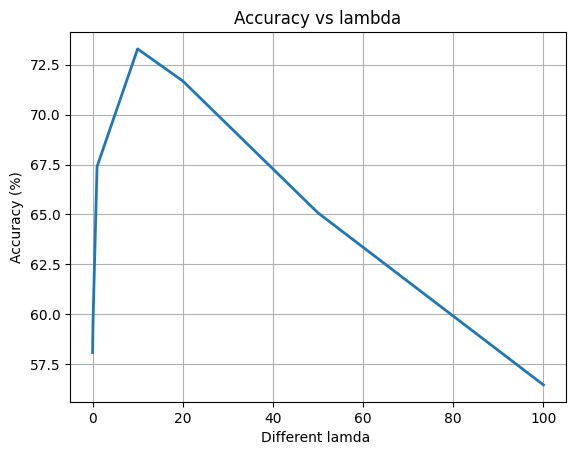

In [12]:
### Making plot 
lbda =[ 0.01, 0.1, 1, 10, 20, 50, 100]
# print(lbda[3])
unique_labels =np.unique(Y_test)
accuracy=[]
for i in range(len(lbda)):
    accuracy.append(calculate_accuracy(lbda[i]))

plt.plot(lbda,accuracy,lw =2)
plt.xlabel('Different lamda ')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs lambda')
plt.grid(True)
  
plt.show()
    